# MOM adaptation of the LASSO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import time
import matplotlib.pyplot as plt
from momAPI.procedure.procedure_MOM import * 
from momAPI.procedure.random_data import *
from momAPI.Linear_models.MOM_LASSO import MomLasso
from momAPI.Cross_validation.MOM_CV import cross_validation_v_fold

In [3]:
plt.style.use("seaborn-darkgrid")

In [4]:
iter_max = 200
n = 200
n_outliers = 3
features  =  50
sparsity  =  10
lamb  =  1 / np.sqrt(50)
K1  =  5
K2  =  7
step_size1  =  0.01
step_size2  =  0.003
sigma  =  1
t_0  =  create_t_0(features , sparsity)
Y1,X1  =  data1(n , t_0 , 1)
Y2,X2  =  data2(n_outliers , features , type_outliers  =  2)
Y,X  =  data_merge(Y1, X1, Y2, X2)

Text(0.5, 0, 'Features number')

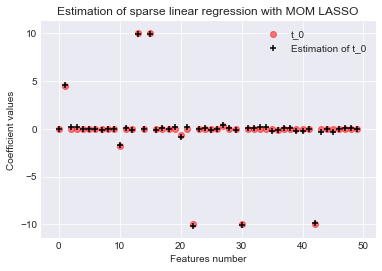

In [14]:
%matplotlib inline
model = MomLasso(8 , lamb = 0.1 , iter_max = 200)
model.fit(X , Y  , step_size = 0.0001 , initialize = "random")
model.coefs_()

plt.scatter(np.arange(50) , t_0  , color = "r" , label = "t_0" , alpha = 0.5 )
plt.scatter(np.arange(50) , model.coefs_() , label = "Estimation of t_0" , color = 'black' , marker = "+")

plt.legend()
plt.title("Estimation of sparse linear regression with MOM LASSO")
plt.ylabel("Coefficient values")
plt.xlabel("Features number")

Outliers: [10000. 10000. 10000.]


(array([11.,  5.,  9.,  8.,  3.,  4.,  0.,  7.,  7.,  2.,  5.,  7.,  4.,
         5.,  6.,  4.,  6.,  2.,  7.,  6.,  9.,  5.,  5.,  5., 11.,  7.,
        10., 13., 11.,  4.,  9.,  7., 11.,  4.,  5.,  8.,  6.,  5.,  4.,
        13.,  9.,  5.,  8.,  4.,  5.,  6.,  3.,  7.,  5.,  4., 10.,  9.,
         4.,  2.,  3.,  7.,  8.,  5., 10.,  4.,  6.,  5.,  4.,  5.,  9.,
         3.,  5.,  4.,  3.,  3.,  6.,  1.,  6.,  4., 11.,  4.,  8.,  2.,
         5.,  9.,  8.,  8.,  4.,  5.,  4.,  7.,  7.,  5.,  5.,  7.,  6.,
         8.,  8.,  6.,  5.,  6.,  5.,  5.,  8.,  6.,  7.,  8.,  6.,  6.,
         5.,  8.,  6.,  8., 10.,  7.,  5.,  3.,  3.,  8.,  0., 11.,  7.,
         8.,  7.,  9.,  6.,  4.,  4.,  7.,  4.,  5., 10.,  6.,  8.,  6.,
         6.,  8.,  4.,  6., 11.,  4.,  7.,  8.,  8.,  7.,  5.,  5.,  9.,
        10.,  7.,  6.,  4.,  6.,  5.,  4.,  4.,  7.,  7.,  7.,  9.,  7.,
         6.,  4.,  2.,  5.,  4.,  3.,  4.,  6.,  2.,  3.,  4.,  6.,  4.,
         9.,  9.,  9.,  6.,  7.,  3.,  7.,  3.,  6.

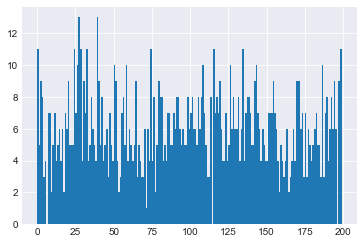

In [17]:
outliers = []
for i in range(len(Y)):
    
    if i not in model.hist :
        outliers.append(i)
print('Outliers:',Y[outliers])

%matplotlib inline
plt.hist(model.hist , bins = np.arange(200))

### Test of the robustness

In [21]:
import numpy.linalg
import progressbar
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.linear_model import Lasso

One outliers

In [23]:
n = 1000
sparsity  =  10
features  =  50
lamb  =  1 / np.sqrt(50)
sigma  =  1
t_0  =  create_t_0(features , sparsity)
Y1 , X1  =  data1(n , t_0 , sigma)
X_train , X_test , Y_train , Y_test = train_test_split(X1 , Y1)
score_MOM = []
score_classic = []
bar = progressbar.progressbar

for n_outliers in bar(range(1 , 100 , 10)) : 
    
    X_train , X_test , Y_train , Y_test = train_test_split(X1 , Y1)
    
    #Data train corruption
    if n_outliers != 0 : 
        Y2 , X2  =  data2(n_outliers , features , type_outliers  =  1)
        Y_train , X_train = data_merge(Y_train , X_train , Y2 , X2)
    
    #Robust model training and evaluation
    model = MomLasso(62 , lamb = lamb)
    model.fit(X_train, Y_train)
    score_step = mean_squared_error(model.predict(X_test),Y_test)
    score_MOM.append(np.mean(score_step))
    
    #Sklearn model training and evalutation
    model_2 = Lasso()
    model_2.fit(X_train, Y_train)
    score_step_class = mean_squared_error(model_2.predict(X_test),Y_test)
    score_classic.append(np.mean(score_step_class))

100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


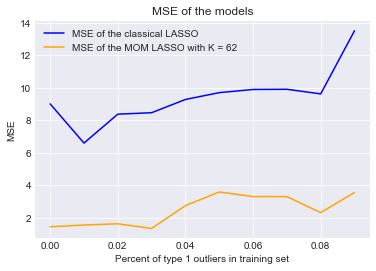

In [24]:
%matplotlib inline
l = [(i * 10 )/1000 for i in range(10)]

plt.plot(l , score_classic , color ='blue' , label = "MSE of the classical LASSO")
plt.plot(l , score_MOM , color ='orange' , label = "MSE of the MOM LASSO with K = 62")
plt.xlabel("Percent of type 1 outliers in training set")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE of the models")
#plt.yscale('log')
plt.savefig('graphs/lasso_type_1.png')

In [25]:
n = 1000
sparsity  =  10
features  =  50
lamb  =  1 / np.sqrt(50)
sigma  =  1
t_0  =  create_t_0(features , sparsity)
Y1 , X1  =  data1(n , t_0 , sigma)
X_train , X_test , Y_train , Y_test = train_test_split(X1 , Y1)
score_MOM = []
score_classic = []
bar = progressbar.progressbar

for n_outliers in bar(range(1 , 50 , 5)) : 
    X_train , X_test , Y_train , Y_test = train_test_split(X1 , Y1)
    #Data train corruption
    if n_outliers != 0 : 
        Y2 , X2  =  data2(n_outliers , features , type_outliers  =  2)
        Y_train , X_train = data_merge(Y_train , X_train , Y2 , X2)
    
    #Robust model training and evaluation
    model = MomLasso(62 , lamb = lamb)
    model.fit(X_train, Y_train)
    score_step = mean_squared_error(model.predict(X_test),Y_test)
    score_MOM.append(np.mean(score_step))
    
    #Sklearn model training and evalutation
    model_2 = Lasso()
    model_2.fit(X_train, Y_train)
    score_step_class = mean_squared_error(model_2.predict(X_test),Y_test)
    score_classic.append(np.mean(score_step_class))

100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


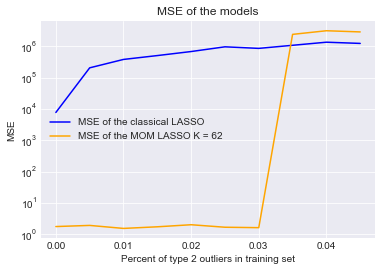

In [26]:
%matplotlib inline

l = [(i * 5 )/1000 for i in range(10)]

plt.plot(l , score_classic , color ='blue' , label = "MSE of the classical LASSO")
plt.plot(l , score_MOM , color ='orange' , label = "MSE of the MOM LASSO K = 62")
plt.xlabel("Percent of type 2 outliers in training set")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE of the models")
plt.yscale('log')
plt.savefig('graphs/lasso_type_2.png')

Heavy tail

In [27]:
n = 1000
sparsity  =  10
features  =  50
lamb  =  1 / np.sqrt(50)
sigma  =  1
t_0  =  create_t_0(features , sparsity)
Y1 , X1  =  data1(n , t_0 , sigma)
X_train , X_test , Y_train , Y_test = train_test_split(X1 , Y1)
score_MOM = []
score_classic = []
bar = progressbar.progressbar

for n_outliers in bar(range(1 , 50 , 5)) : 
    
    #Data train corruption
    if n_outliers != 0 : 
        Y2 , X2  =  data3(n_outliers , t_0)
        Y_train , X_train = data_merge(Y_train , X_train , Y2 , X2)
    
    #Robust model training and evaluation
    model = MomLasso(62 , lamb = lamb)
    model.fit(X_train, Y_train)
    score_step = np.sum(np.square(model.predict(X_test)-Y_test))
    score_MOM.append(np.mean(score_step))
    
    #Sklearn model training and evalutation
    model_2 = Lasso()
    model_2.fit(X_train, Y_train)
    score_step_class = np.sum(np.square(model_2.predict(X_test)-Y_test))
    score_classic.append(np.mean(score_step_class))

100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


Text(0.5, 1.0, 'MSE of the model')

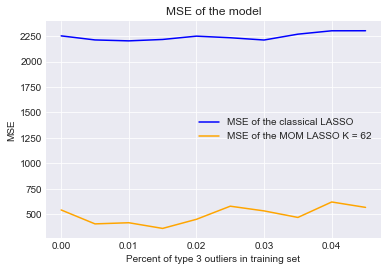

In [28]:
%matplotlib inline

l = [(i * 5 )/1000 for i in range(10)]

plt.plot(l , score_classic , color ='blue' , label = "MSE of the classical LASSO")
plt.plot(l , score_MOM , color ='orange' , label = "MSE of the MOM LASSO K = 62")
plt.xlabel("Percent of type 3 outliers in training set")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE of the model")

Source : [1] Regression shrinkage and selection via the lasso, Robert Tibshirani, 1996